In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 20)
sns.set(font='Malgun Gothic')
%matplotlib inline

In [2]:
import os

In [3]:
df_raw = pd.read_csv('./data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20200328114734.csv', encoding='cp949')

In [4]:
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014 1/4', '2014 2/4', '2014 3/4',
       '2014 4/4', '2015 1/4', '2015 2/4', '2015 3/4', '2015 4/4', '2016 1/4',
       '2016 2/4', '2016 3/4', '2016 4/4', '2017 1/4', '2017 2/4', '2017 3/4',
       '2017 4/4', '2018 1/4', '2018 2/4', '2018 3/4', '2018 4/4', '2019 1/4',
       '2019 2/4', '2019 3/4', '2019 4/4 p)'],
      dtype='object')

In [5]:
df = df_raw.melt(['국가(대륙)별', '상품군별', '판매유형별'], var_name='기간', value_name='백만원').copy()

In [6]:
for i in df.columns:
    print(f'{i}에 대한 값: {df[i].unique()}\n')

국가(대륙)별에 대한 값: ['합계' '미국' '중국' '일본' '아세안(ASEAN)' 'EU' '중동' '중남미' '대양주' '기타']

상품군별에 대한 값: ['합계' '컴퓨터 및 주변기기' '가전·전자·통신기기' '소프트웨어' '서 적' '사무·문구' '음반·비디오·악기'
 '의류 및 패션관련 상품' '스포츠·레저용품' '화장품' '아동·유아용품' '음·식료품' '농축수산물' '생활용품 및 자동차용품'
 '기 타']

판매유형별에 대한 값: ['계' '면세점' '면세점 이외']

기간에 대한 값: ['2014 1/4' '2014 2/4' '2014 3/4' '2014 4/4' '2015 1/4' '2015 2/4'
 '2015 3/4' '2015 4/4' '2016 1/4' '2016 2/4' '2016 3/4' '2016 4/4'
 '2017 1/4' '2017 2/4' '2017 3/4' '2017 4/4' '2018 1/4' '2018 2/4'
 '2018 3/4' '2018 4/4' '2019 1/4' '2019 2/4' '2019 3/4' '2019 4/4 p)']

백만원에 대한 값: ['148272' '-' '4915' ... 138 531 1094]



In [7]:
df['기간'].unique()

array(['2014 1/4', '2014 2/4', '2014 3/4', '2014 4/4', '2015 1/4',
       '2015 2/4', '2015 3/4', '2015 4/4', '2016 1/4', '2016 2/4',
       '2016 3/4', '2016 4/4', '2017 1/4', '2017 2/4', '2017 3/4',
       '2017 4/4', '2018 1/4', '2018 2/4', '2018 3/4', '2018 4/4',
       '2019 1/4', '2019 2/4', '2019 3/4', '2019 4/4 p)'], dtype=object)

In [8]:
'2014 1/4 )p'.split()[1].split('/')[0]

'1'

In [9]:
df['쿼터'] = df['기간'].map(lambda x: x.split()[1].split('/')[0])

In [10]:
df

,국가(대륙)별,상품군별,판매유형별,기간,백만원,쿼터
0,합계,합계,계,2014 1/4,148272,1
1,합계,합계,면세점,2014 1/4,-,1
2,합계,합계,면세점 이외,2014 1/4,-,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,1
...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4 p),0,4
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4 p),531,4
10797,기타,기 타,계,2019 4/4 p),1094,4
10798,기타,기 타,면세점,2019 4/4 p),1,4


In [11]:
df['쿼터'].unique()

array(['1', '2', '3', '4'], dtype=object)

In [12]:
df['연도'] = df['기간'].map(lambda x: x.split()[0])

In [13]:
df

,국가(대륙)별,상품군별,판매유형별,기간,백만원,쿼터,연도
0,합계,합계,계,2014 1/4,148272,1,2014
1,합계,합계,면세점,2014 1/4,-,1,2014
2,합계,합계,면세점 이외,2014 1/4,-,1,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,1,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,1,2014
...,...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4 p),0,4,2019
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4 p),531,4,2019
10797,기타,기 타,계,2019 4/4 p),1094,4,2019
10798,기타,기 타,면세점,2019 4/4 p),1,4,2019


In [14]:
df['백만원'] = df['백만원'].replace('-', np.nan).astype(float)

In [15]:
df

,국가(대륙)별,상품군별,판매유형별,기간,백만원,쿼터,연도
0,합계,합계,계,2014 1/4,148272.0,1,2014
1,합계,합계,면세점,2014 1/4,NaN,1,2014
2,합계,합계,면세점 이외,2014 1/4,NaN,1,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,1,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,1,2014
...,...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4 p),0.0,4,2019
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4 p),531.0,4,2019
10797,기타,기 타,계,2019 4/4 p),1094.0,4,2019
10798,기타,기 타,면세점,2019 4/4 p),1.0,4,2019


In [16]:
df.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '기간', '백만원', '쿼터', '연도'], dtype='object')

In [33]:
df = df[(df['국가(대륙)별']!='합계') & (df['상품군별']!='합계')].copy()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  9072 non-null   object 
 1   상품군별     9072 non-null   object 
 2   판매유형별    9072 non-null   object 
 3   기간       9072 non-null   object 
 4   백만원      6048 non-null   float64
 5   쿼터       9072 non-null   object 
 6   연도       9072 non-null   object 
dtypes: float64(1), object(6)
memory usage: 567.0+ KB


In [19]:
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
쿼터            0
연도            0
dtype: int64

In [20]:
df_total = df[df['판매유형별']=='계'].copy()

In [21]:
df_total

,국가(대륙)별,상품군별,판매유형별,기간,백만원,쿼터,연도
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,1,2014
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,1,2014
54,미국,소프트웨어,계,2014 1/4,47.0,1,2014
57,미국,서 적,계,2014 1/4,962.0,1,2014
60,미국,사무·문구,계,2014 1/4,25.0,1,2014
...,...,...,...,...,...,...,...
10785,기타,아동·유아용품,계,2019 4/4 p),192.0,4,2019
10788,기타,음·식료품,계,2019 4/4 p),315.0,4,2019
10791,기타,농축수산물,계,2019 4/4 p),2.0,4,2019
10794,기타,생활용품 및 자동차용품,계,2019 4/4 p),531.0,4,2019


In [22]:
df_total[~df_total['상품군별'].isin(['화장품'])]
# df_total[df_total['상품군별']!='화장품'] 둘은 같은 내용

,국가(대륙)별,상품군별,판매유형별,기간,백만원,쿼터,연도
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,1,2014
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,1,2014
54,미국,소프트웨어,계,2014 1/4,47.0,1,2014
57,미국,서 적,계,2014 1/4,962.0,1,2014
60,미국,사무·문구,계,2014 1/4,25.0,1,2014
...,...,...,...,...,...,...,...
10785,기타,아동·유아용품,계,2019 4/4 p),192.0,4,2019
10788,기타,음·식료품,계,2019 4/4 p),315.0,4,2019
10791,기타,농축수산물,계,2019 4/4 p),2.0,4,2019
10794,기타,생활용품 및 자동차용품,계,2019 4/4 p),531.0,4,2019


In [23]:
df_sub = df_total[~df_total['상품군별'].isin(['농축수산물', '화장품', '의류 및 패션관련 상품'])]

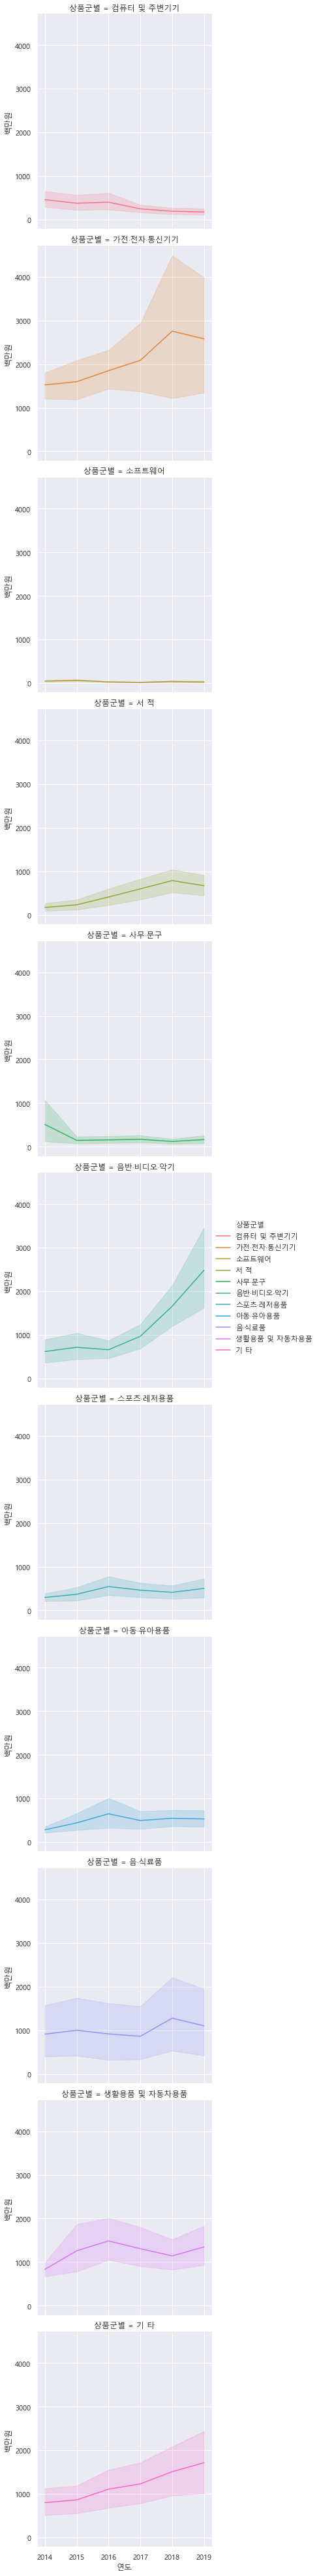

In [24]:
sns.relplot(data=df_sub, x='연도', y='백만원', hue='상품군별', kind='line', col='상품군별', col_wrap=4)

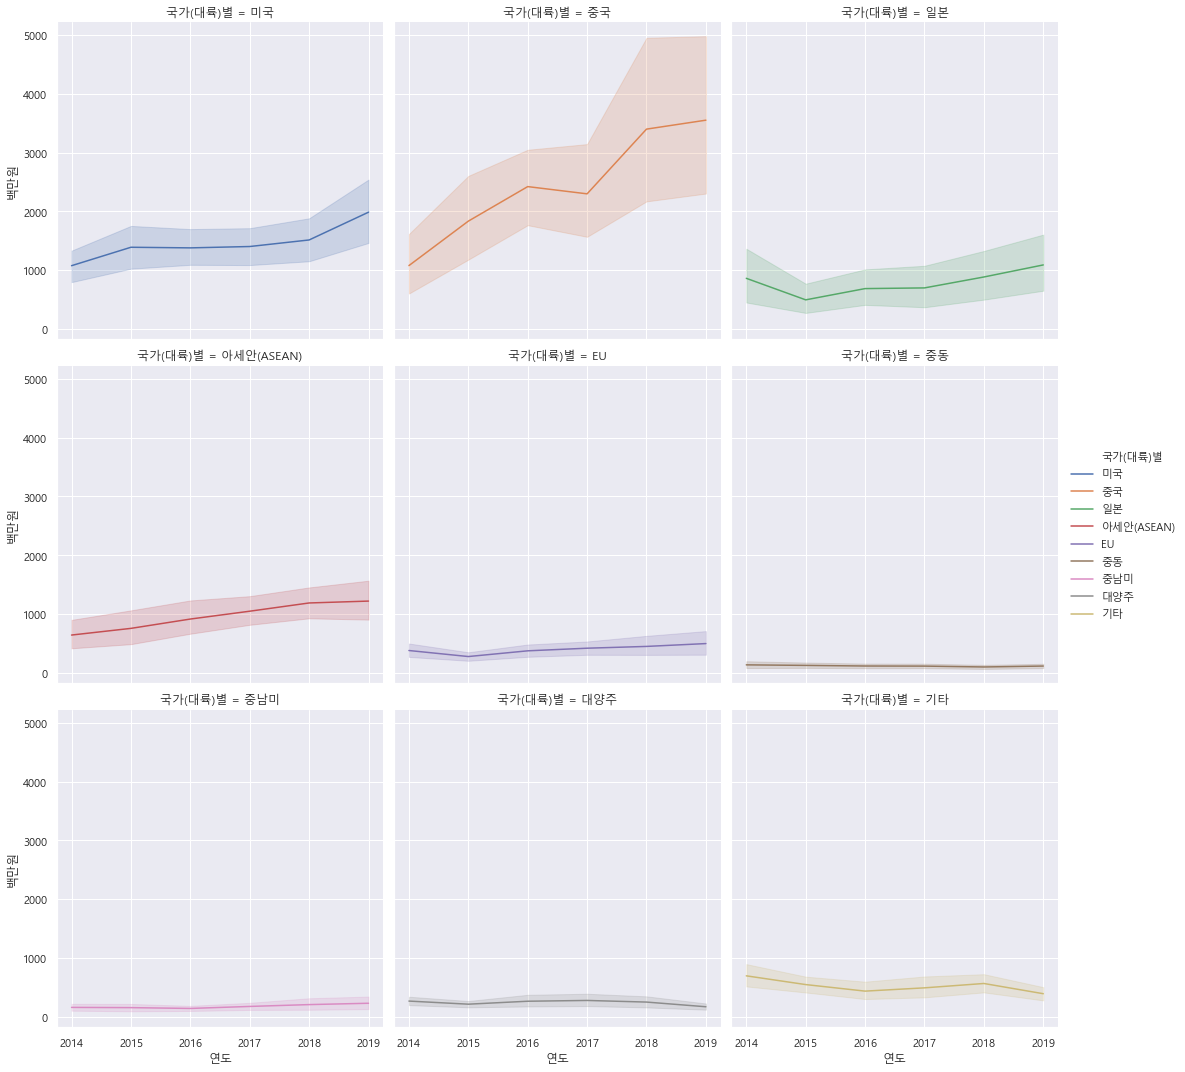

In [25]:
sns.relplot(data=df_sub, x='연도', y='백만원', hue='국가(대륙)별', kind='line', col='국가(대륙)별', col_wrap=3)

In [26]:
df

,국가(대륙)별,상품군별,판매유형별,기간,백만원,쿼터,연도
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,1,2014
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,1,2014
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,1,2014
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,1,2014
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,1,2014
...,...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4 p),0.0,4,2019
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4 p),531.0,4,2019
10797,기타,기 타,계,2019 4/4 p),1094.0,4,2019
10798,기타,기 타,면세점,2019 4/4 p),1.0,4,2019


In [30]:
df['상품군별'].unique()

array(['컴퓨터 및 주변기기', '가전·전자·통신기기', '소프트웨어', '서 적', '사무·문구', '음반·비디오·악기',
       '의류 및 패션관련 상품', '스포츠·레저용품', '화장품', '아동·유아용품', '음·식료품', '농축수산물',
       '생활용품 및 자동차용품', '기 타'], dtype=object)

In [34]:
df_cosmetic = df[df['상품군별'].isin(['의류 및 패션관리 상품', '화장품'])]

In [37]:
df_cosmetic_sns = df_cosmetic[df_cosmetic['판매유형별']=='계']

In [49]:
df_cosmetic_sns[~(df_cosmetic_sns['국가(대륙)별']=='중국')]

,국가(대륙)별,상품군별,판매유형별,기간,백만원,쿼터,연도
72,미국,화장품,계,2014 1/4,3740.0,1,2014
162,일본,화장품,계,2014 1/4,1034.0,1,2014
207,아세안(ASEAN),화장품,계,2014 1/4,398.0,1,2014
252,EU,화장품,계,2014 1/4,937.0,1,2014
297,중동,화장품,계,2014 1/4,418.0,1,2014
...,...,...,...,...,...,...,...
10602,EU,화장품,계,2019 4/4 p),3904.0,4,2019
10647,중동,화장품,계,2019 4/4 p),1129.0,4,2019
10692,중남미,화장품,계,2019 4/4 p),636.0,4,2019
10737,대양주,화장품,계,2019 4/4 p),1084.0,4,2019


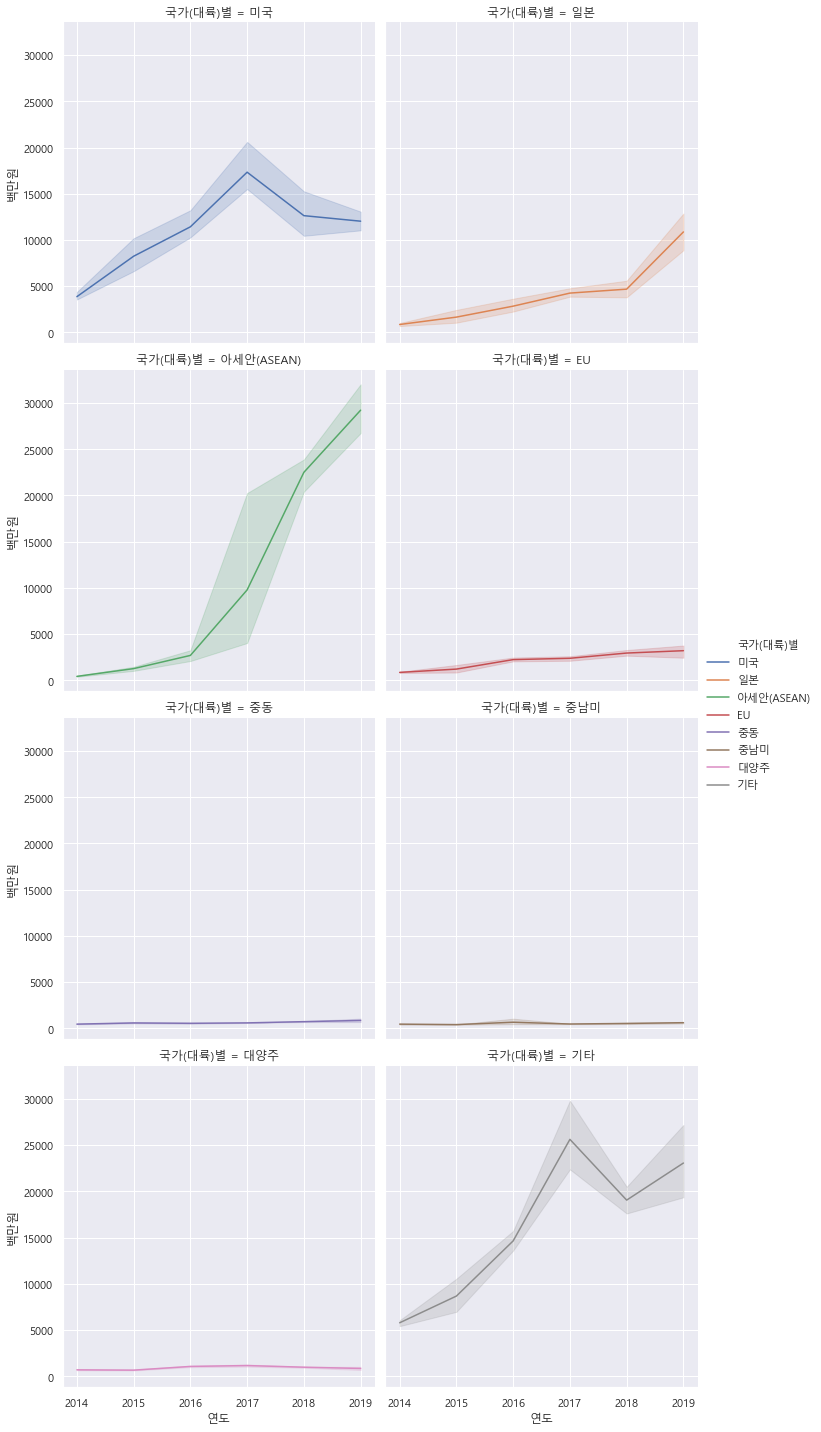

In [54]:
sns.relplot(data=df_cosmetic_sns[~(df_cosmetic_sns['국가(대륙)별']=='중국')], x='연도', y='백만원', hue='국가(대륙)별', kind='line', col='국가(대륙)별', col_wrap=2)

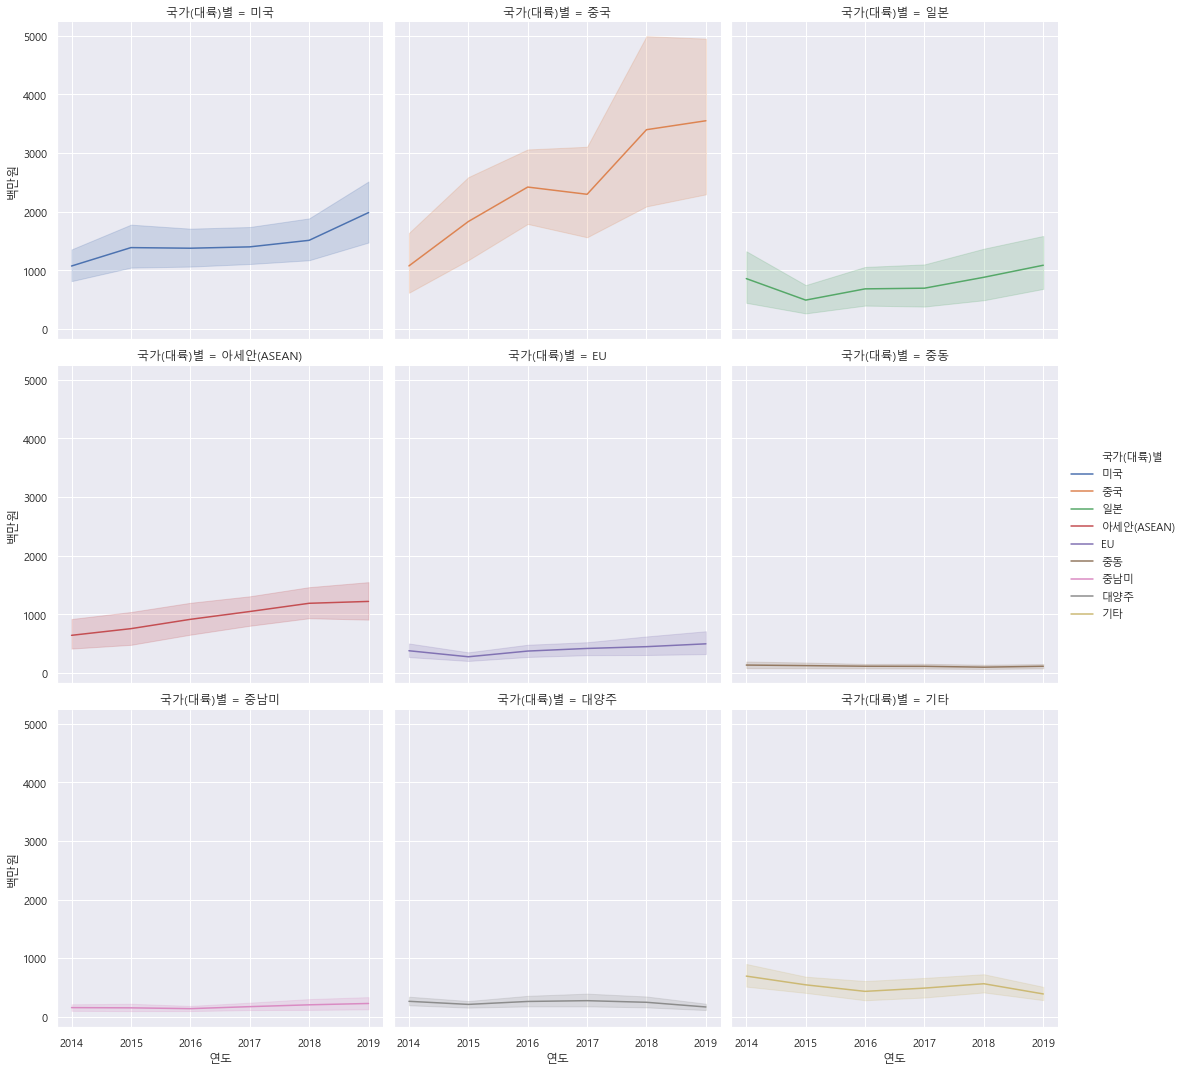

In [27]:
sns.relplot(data=df_sub, x='연도', y='백만원', hue='국가(대륙)별', kind='line', col='국가(대륙)별', col_wrap=3)

<AxesSubplot:xlabel='기간', ylabel='백만원'>

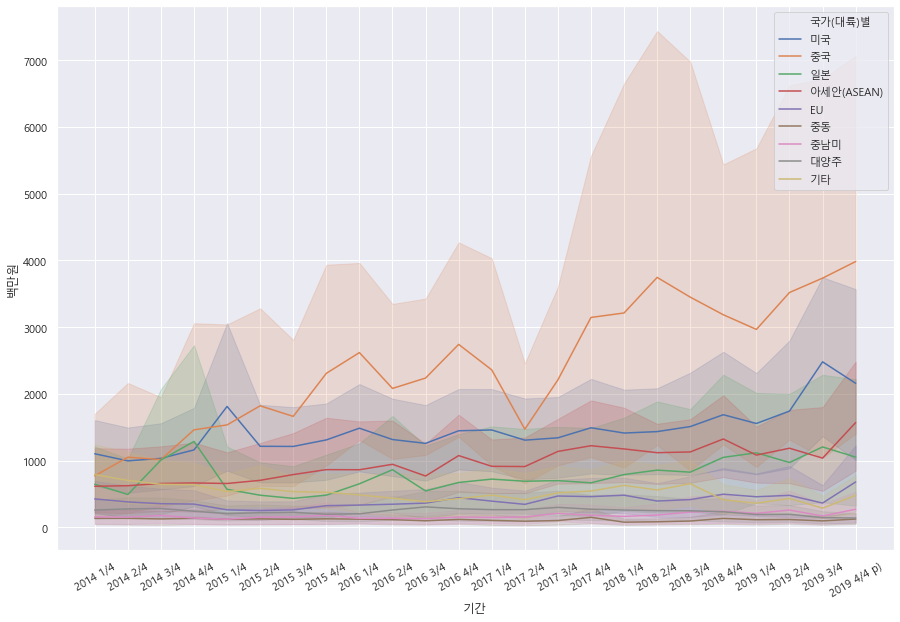

In [29]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=30)

sns.lineplot(data=df_sub, x='기간', y='백만원', hue='국가(대륙)별')
